# Exploratory Analysis of the Neutrino Flux from a Muon Ring

In [1]:
from muon_collider_mc import *
import matplotlib.pyplot as plt

from matplotlib.colors import LogNorm

from matplotlib.pylab import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

In [3]:
flux = NeutrinoFluxMuonRing(Emu=1.5e6, ring_radius=0.716, det_dist=200.0, n_samples=10000000)
flux.simulate_fluxes_mc()

### Get angular distributions in the lab frame

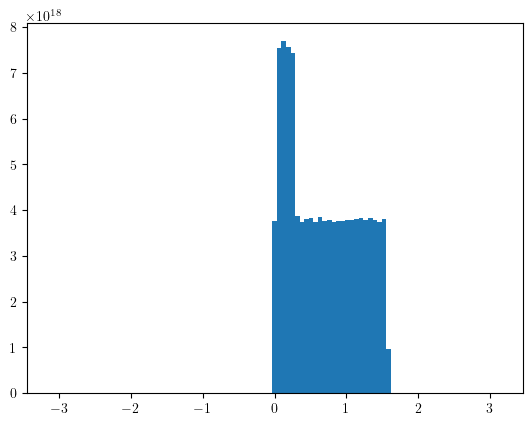

In [3]:
theta_numu = np.arccos(flux.pnumu_3vec_lab[:,2] / np.sqrt(flux.pnumu_3vec_lab[:,0]**2 + flux.pnumu_3vec_lab[:,1]**2 + flux.pnumu_3vec_lab[:,2]**2))
theta_nuebar = np.arccos(flux.pnuebar_3vec_lab[:,2] / np.sqrt(flux.pnuebar_3vec_lab[:,0]**2 + flux.pnuebar_3vec_lab[:,1]**2 + flux.pnuebar_3vec_lab[:,2]**2))


angle_bins = np.linspace(-np.pi, np.pi, 100)
plt.hist(theta_numu, weights=flux.flux_weights_numu, bins=angle_bins)
plt.show()



### Get X-Y distribution at the detector

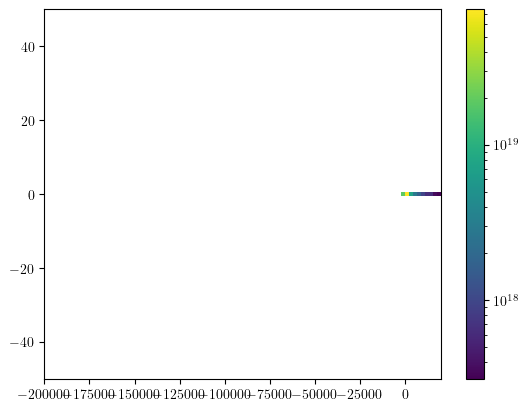

In [3]:


y_bins = np.linspace(-200000.5, 20000, 100)
x_bins = np.linspace(-50, 50, 100)
plt.hist2d(flux.y_nu_at_L, flux.x_nu_at_L, weights=flux.flux_weights_numu, bins=[y_bins,x_bins], norm=LogNorm())
plt.colorbar()
plt.show()


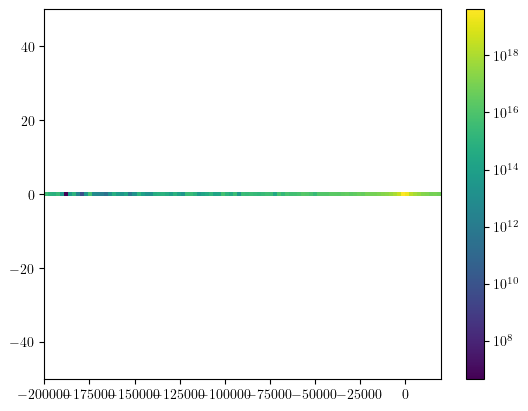

In [4]:

y_bins = np.linspace(-200000.5, 20000, 100)
x_bins = np.linspace(-50, 50, 100)
plt.hist2d(flux.y_nu_conj_at_L, flux.x_nu_conj_at_L, weights=flux.flux_weights_nue, bins=[y_bins,x_bins], norm=LogNorm())
plt.colorbar()
plt.show()


### Close-ups

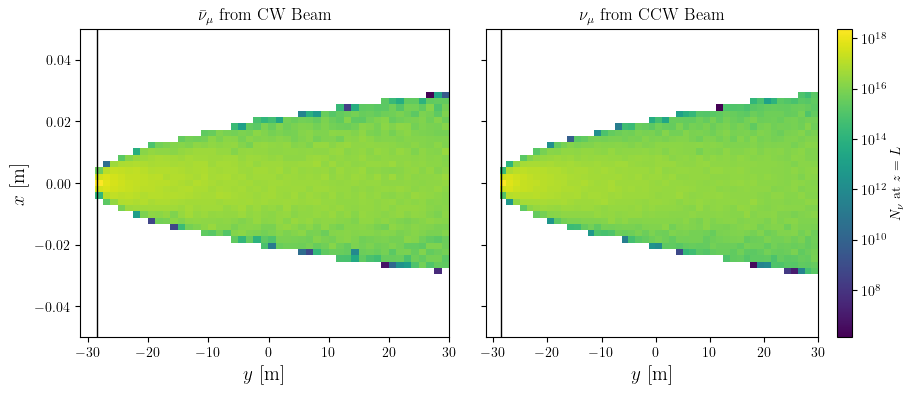

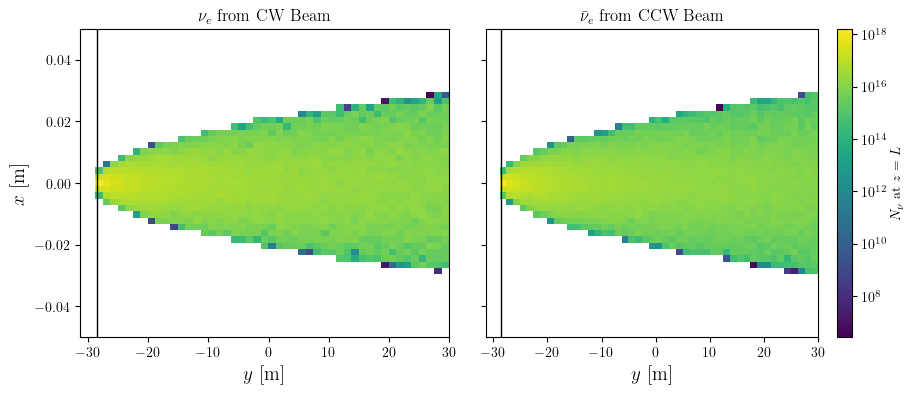

In [10]:
y_crit = flux.R * np.cos(np.arcsin(flux.det_dist/flux.R)) - flux.R

y_bins = np.linspace(1.1*y_crit, 30.0, 50)
x_bins = np.linspace(-0.05, 0.05, 50)

fig, ax = plt.subplots(1,2, figsize=(10,4), sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.1)
h1 = ax[0].hist2d(flux.y_nu_conj_at_L, flux.x_nu_conj_at_L, weights=flux.flux_weights_numu*flux.intersect_wgt_z_conj,
                  bins=[y_bins,x_bins], cmin=1, norm=LogNorm())
h2 = ax[1].hist2d(flux.y_nu_at_L, flux.x_nu_at_L, weights=flux.flux_weights_numu*flux.intersect_wgt_z,
                  bins=[y_bins,x_bins], cmin=1, norm=LogNorm())
#cbar1 = fig.colorbar(h1[3], ax=ax[0], orientation='vertical', fraction=0.05, pad=0.05)
#cbar1.set_label("Counts")

cbar2 = fig.colorbar(h2[3], ax=ax[1], orientation='vertical', fraction=0.05, pad=0.05)
cbar2.set_label(r"$N_\nu$ at $z=L$")

# Plot the edge where z=L
ax[0].vlines(y_crit, x_bins[0], x_bins[-1], color='k', linewidth=1.0)
ax[1].vlines(y_crit, x_bins[0], x_bins[-1], color='k', linewidth=1.0)

ax[0].set_title(r"$\bar{\nu}_\mu$ from CW Beam")
ax[1].set_title(r"$\nu_\mu$ from CCW Beam")

ax[0].set_ylabel(r"$x$ [m]", fontsize=14)
ax[0].set_xlabel(r"$y$ [m]", fontsize=14)
ax[1].set_xlabel(r"$y$ [m]", fontsize=14)
plt.show()


fig, ax = plt.subplots(1,2, figsize=(10,4), sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.1)
h1 = ax[0].hist2d(flux.y_nu_conj_at_L, flux.x_nu_conj_at_L, weights=flux.flux_weights_nue*flux.intersect_wgt_z_conj,
                  bins=[y_bins,x_bins], cmin=1, norm=LogNorm())
h2 = ax[1].hist2d(flux.y_nu_at_L, flux.x_nu_at_L, weights=flux.flux_weights_nue*flux.intersect_wgt_z,
                  bins=[y_bins,x_bins], cmin=1, norm=LogNorm())
#cbar1 = fig.colorbar(h1[3], ax=ax[0], orientation='vertical', fraction=0.05, pad=0.05)
#cbar1.set_label("Counts")

cbar2 = fig.colorbar(h2[3], ax=ax[1], orientation='vertical', fraction=0.05, pad=0.05)
cbar2.set_label(r"$N_\nu$ at $z=L$")

# Plot the edge where z=L
ax[0].vlines(y_crit, x_bins[0], x_bins[-1], color='k', linewidth=1.0)
ax[1].vlines(y_crit, x_bins[0], x_bins[-1], color='k', linewidth=1.0)

ax[0].set_title(r"$\nu_e$ from CW Beam")
ax[1].set_title(r"$\bar{\nu}_e$ from CCW Beam")

ax[0].set_ylabel(r"$x$ [m]", fontsize=14)
ax[0].set_xlabel(r"$y$ [m]", fontsize=14)
ax[1].set_xlabel(r"$y$ [m]", fontsize=14)
plt.show()

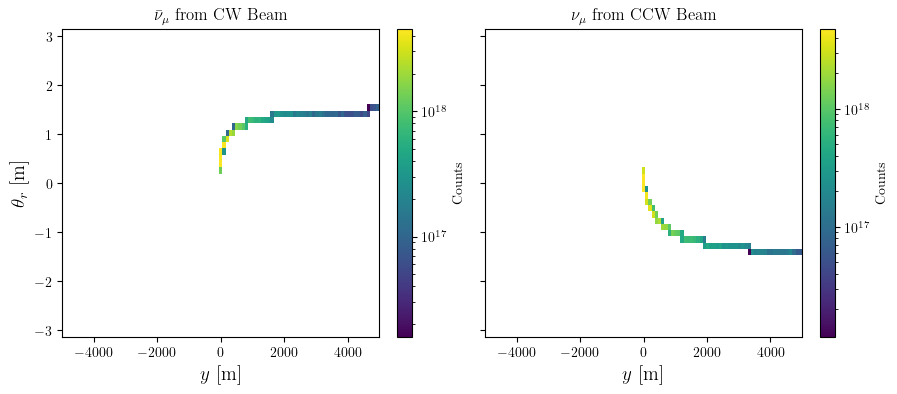

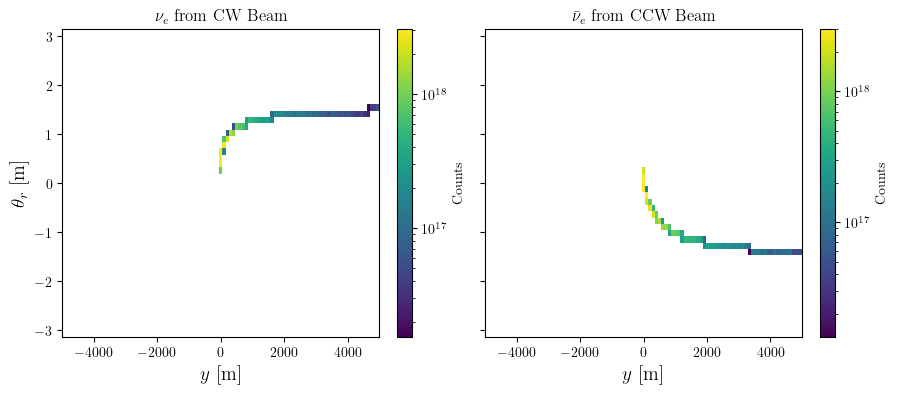

In [11]:
y_crit = flux.R * np.cos(np.arcsin(flux.det_dist/flux.R)) - flux.R

y_bins = np.linspace(-5000, 5000, 100)
theta_bins = np.linspace(-np.pi, np.pi, 50)

fig, ax = plt.subplots(1,2, figsize=(10,4), sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.2)
h1 = ax[0].hist2d(flux.y_nu_conj_at_L, flux.theta_ring_antimuon, weights=flux.flux_weights_numu*flux.intersect_wgt_z_conj, bins=[y_bins,theta_bins], norm=LogNorm())
h2 = ax[1].hist2d(flux.y_nu_at_L, flux.theta_ring_muon, weights=flux.flux_weights_numu*flux.intersect_wgt_z, bins=[y_bins,theta_bins], norm=LogNorm())
cbar1 = fig.colorbar(h1[3], ax=ax[0], orientation='vertical', fraction=0.05, pad=0.05)
cbar1.set_label("Counts")

cbar2 = fig.colorbar(h2[3], ax=ax[1], orientation='vertical', fraction=0.05, pad=0.05)
cbar2.set_label("Counts")

ax[0].set_title(r"$\bar{\nu}_\mu$ from CW Beam")
ax[1].set_title(r"$\nu_\mu$ from CCW Beam")

ax[0].set_ylabel(r"$\theta_r$ [m]", fontsize=14)
ax[0].set_xlabel(r"$y$ [m]", fontsize=14)
ax[1].set_xlabel(r"$y$ [m]", fontsize=14)
plt.show()


fig, ax = plt.subplots(1,2, figsize=(10,4), sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.2)
h1 = ax[0].hist2d(flux.y_nu_conj_at_L, flux.theta_ring_antimuon, weights=flux.flux_weights_nue*flux.intersect_wgt_z_conj, bins=[y_bins,theta_bins], norm=LogNorm())
h2 = ax[1].hist2d(flux.y_nu_at_L, flux.theta_ring_muon, weights=flux.flux_weights_nue*flux.intersect_wgt_z, bins=[y_bins,theta_bins], norm=LogNorm())
cbar1 = fig.colorbar(h1[3], ax=ax[0], orientation='vertical', fraction=0.05, pad=0.05)
cbar1.set_label("Counts")

cbar2 = fig.colorbar(h2[3], ax=ax[1], orientation='vertical', fraction=0.05, pad=0.05)
cbar2.set_label("Counts")

ax[0].set_title(r"$\nu_e$ from CW Beam")
ax[1].set_title(r"$\bar{\nu}_e$ from CCW Beam")

ax[0].set_ylabel(r"$\theta_r$ [m]", fontsize=14)
ax[0].set_xlabel(r"$y$ [m]", fontsize=14)
ax[1].set_xlabel(r"$y$ [m]", fontsize=14)
plt.show()

### Ray tracing

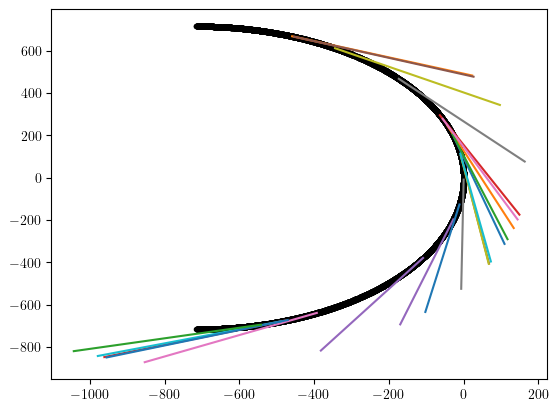

In [10]:
y_dec_antimuon = flux.R*np.cos(flux.theta_ring_antimuon) - flux.R
z_dec_antimuon = flux.R*np.sin(flux.theta_ring_antimuon)

pnu_unit_x = flux.pnumubar_3vec_lab[:,0] / np.sqrt(flux.pnumubar_3vec_lab[:,0]**2 + flux.pnumubar_3vec_lab[:,1]**2 + flux.pnumubar_3vec_lab[:,2]**2)
pnu_unit_z = flux.pnumubar_3vec_lab[:,2] / np.sqrt(flux.pnumubar_3vec_lab[:,0]**2 + flux.pnumubar_3vec_lab[:,1]**2 + flux.pnumubar_3vec_lab[:,2]**2)
pnu_unit_y = flux.pnumubar_3vec_lab[:,1] / np.sqrt(flux.pnumubar_3vec_lab[:,0]**2 + flux.pnumubar_3vec_lab[:,1]**2 + flux.pnumubar_3vec_lab[:,2]**2)

t_vals = np.linspace(0.0, -flux.det_dist + flux.R, 5)

plt.scatter(y_dec_antimuon, z_dec_antimuon, color='k', marker='.')

for i in range(flux.n_samples):
    if i > 20:
        continue
    z_rays = z_dec_antimuon[i] + t_vals * pnu_unit_z[i]
    y_rays = y_dec_antimuon[i] + t_vals * pnu_unit_y[i]
    plt.plot(y_rays, z_rays)


plt.show()

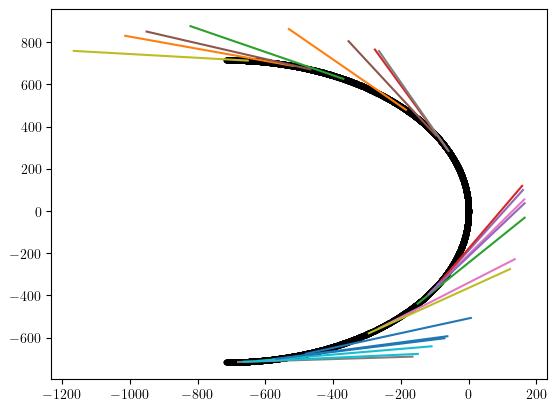

In [9]:
y_dec_antimuon = flux.R*np.cos(flux.theta_ring_muon) - flux.R
z_dec_antimuon = flux.R*np.sin(flux.theta_ring_muon)

pnu_unit_x = flux.pnumu_3vec_lab[:,0] / np.sqrt(flux.pnumu_3vec_lab[:,0]**2 + flux.pnumu_3vec_lab[:,1]**2 + flux.pnumu_3vec_lab[:,2]**2)
pnu_unit_z = flux.pnumu_3vec_lab[:,2] / np.sqrt(flux.pnumu_3vec_lab[:,0]**2 + flux.pnumu_3vec_lab[:,1]**2 + flux.pnumu_3vec_lab[:,2]**2)
pnu_unit_y = flux.pnumu_3vec_lab[:,1] / np.sqrt(flux.pnumu_3vec_lab[:,0]**2 + flux.pnumu_3vec_lab[:,1]**2 + flux.pnumu_3vec_lab[:,2]**2)

t_vals = np.linspace(0.0, -(flux.det_dist - flux.R), 5)

plt.scatter(y_dec_antimuon, z_dec_antimuon, color='k', marker='.')

for i in range(flux.n_samples):
    if i > 20:
        continue
    z_rays = z_dec_antimuon[i] + t_vals * pnu_unit_z[i]
    y_rays = y_dec_antimuon[i] + t_vals * pnu_unit_y[i]
    plt.plot(y_rays, z_rays)


plt.show()

### Even...closer (detector face: 5x5 meter squared)

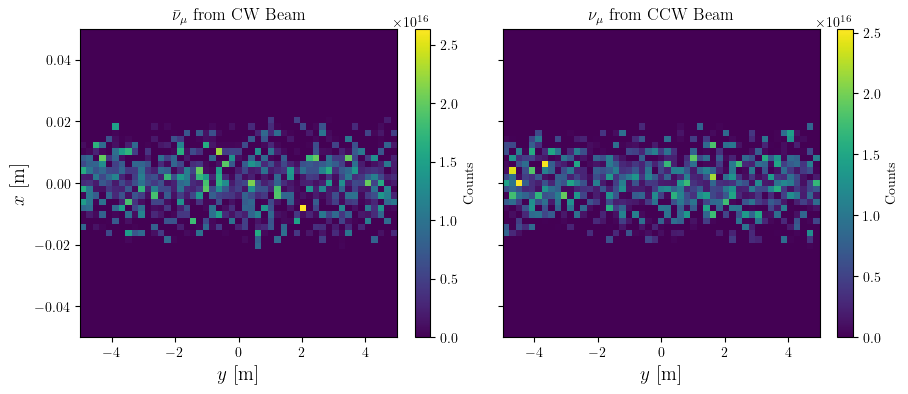

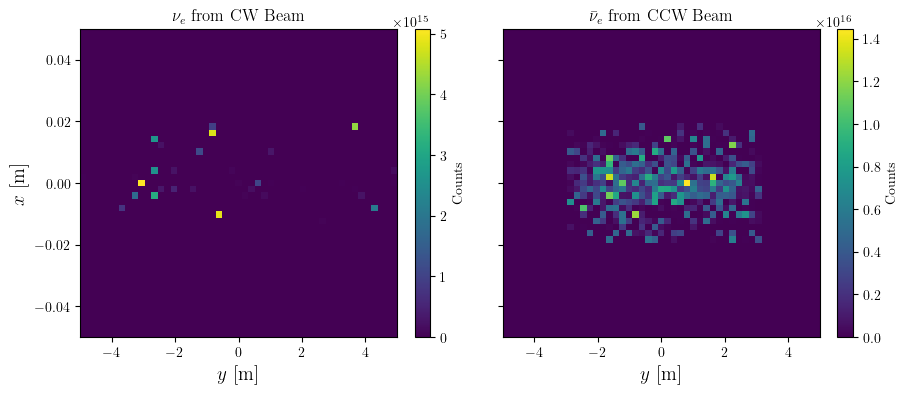

In [5]:
y_bins = np.linspace(-5, 5, 50)
x_bins = np.linspace(-0.05, 0.05, 50)

fig, ax = plt.subplots(1,2, figsize=(10,4), sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.2)
h1 = ax[0].hist2d(flux.y_nu_conj_at_L, flux.x_nu_conj_at_L, weights=flux.flux_weights_numu, bins=[y_bins,x_bins])
h2 = ax[1].hist2d(flux.y_nu_at_L, flux.x_nu_at_L, weights=flux.flux_weights_numu, bins=[y_bins,x_bins])
cbar1 = fig.colorbar(h1[3], ax=ax[0], orientation='vertical', fraction=0.05, pad=0.05)
cbar1.set_label("Counts")

cbar2 = fig.colorbar(h2[3], ax=ax[1], orientation='vertical', fraction=0.05, pad=0.05)
cbar2.set_label("Counts")

ax[0].set_title(r"$\bar{\nu}_\mu$ from CW Beam")
ax[1].set_title(r"$\nu_\mu$ from CCW Beam")

ax[0].set_ylabel(r"$x$ [m]", fontsize=14)
ax[0].set_xlabel(r"$y$ [m]", fontsize=14)
ax[1].set_xlabel(r"$y$ [m]", fontsize=14)
plt.show()


fig, ax = plt.subplots(1,2, figsize=(10,4), sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.2)
h1 = ax[0].hist2d(flux.y_nu_conj_at_L, flux.x_nu_conj_at_L, weights=flux.accept_wgt_nue, bins=[y_bins,x_bins])
h2 = ax[1].hist2d(flux.y_nu_at_L, flux.x_nu_at_L, weights=flux.accept_wgt_nuebar, bins=[y_bins,x_bins])
cbar1 = fig.colorbar(h1[3], ax=ax[0], orientation='vertical', fraction=0.05, pad=0.05)
cbar1.set_label("Counts")

cbar2 = fig.colorbar(h2[3], ax=ax[1], orientation='vertical', fraction=0.05, pad=0.05)
cbar2.set_label("Counts")

ax[0].set_title(r"$\nu_e$ from CW Beam")
ax[1].set_title(r"$\bar{\nu}_e$ from CCW Beam")

ax[0].set_ylabel(r"$x$ [m]", fontsize=14)
ax[0].set_xlabel(r"$y$ [m]", fontsize=14)
ax[1].set_xlabel(r"$y$ [m]", fontsize=14)
plt.show()

# Try with different detector configs

In [4]:
det_distances = np.array([50.0, 100.0, 150.0, 200.0, 250.0, 300.0, 400.0, 500.0, 600.0, 715.0, 720.0, 800.0, 1000.0, 1200.0])

flux = NeutrinoFluxMuonRing(Emu=1.5e6, ring_radius=0.716, det_dist=400.0, n_samples=1000000, det_area=25.0, det_length=5.0)

nue_accept = []
numu_accept = []
numubar_accept = []
nuebar_accept = []

theory_accept = arctan(flux.det_width/det_distances)/np.pi

for l in det_distances:
    print("On l = {}".format(l))
    flux.det_dist = l
    flux.simulate_fluxes_mc()

    nue_accept.append(np.sum(flux.accept_wgt_nue)/np.sum(flux.flux_weights_nue))
    nuebar_accept.append(np.sum(flux.accept_wgt_nuebar)/np.sum(flux.flux_weights_nue))
    numu_accept.append(np.sum(flux.accept_wgt_numu)/np.sum(flux.flux_weights_numu))
    numubar_accept.append(np.sum(flux.accept_wgt_numubar)/np.sum(flux.flux_weights_numu))


On l = 50.0
On l = 100.0
On l = 150.0
On l = 200.0


KeyboardInterrupt: 

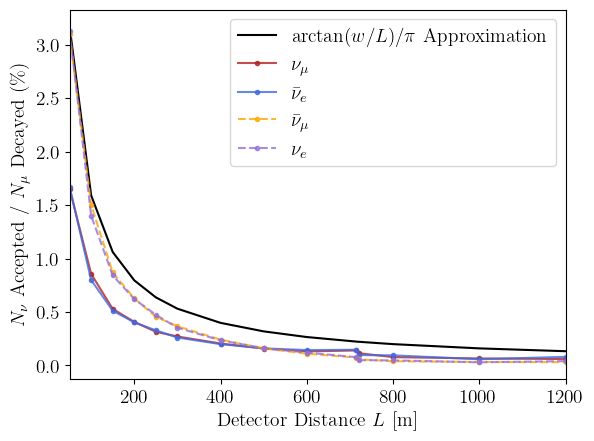

In [4]:
plt.plot(det_distances, 100.0*theory_accept, label=r"$\arctan(w/L)/\pi$ Approximation", color='k')



plt.plot(det_distances, 100.0*np.array(numu_accept), label=r"$\nu_\mu$", color='firebrick', alpha=0.8, marker='.')
plt.plot(det_distances, 100.0*np.array(nuebar_accept), label=r"$\bar{\nu}_e$", color='royalblue', alpha=0.8, marker='.')
plt.plot(det_distances, 100.0*np.array(numubar_accept), label=r"$\bar{\nu}_\mu$", color='orange', alpha=0.8, ls='dashed', marker='.')
plt.plot(det_distances, 100.0*np.array(nue_accept), label=r"$\nu_e$", ls='dashed', color='mediumpurple', alpha=0.8, marker='.')
plt.xlabel(r"Detector Distance $L$ [m]",fontsize=14)
plt.ylabel(r"$N_\nu$ Accepted / $N_\mu$ Decayed (\%)",fontsize=14)
#plt.yscale('log')
plt.xlim((det_distances[0], det_distances[-1]))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.show()

# Get Neutrino Rates in the Detector for the 200m benchmark, 5x5x5 m^3 detector

In [ ]:
flux = NeutrinoFluxMuonRing(Emu=1.5e6, ring_radius=0.716, det_dist=200.0, n_samples=10000000)
flux.simulate_fluxes_mc()

In [6]:
# Counts inside detector

in_det_mask_conj_y = (flux.y_nu_conj_at_L > -2.5) * (flux.y_nu_conj_at_L < 2.5)
in_det_mask_y = (flux.y_nu_at_L > -2.5) * (flux.y_nu_at_L < 2.5)

n_numu_in_det = np.sum(flux.flux_weights_numu[in_det_mask_y])
n_nuebar_in_det = np.sum(flux.flux_weights_nue[in_det_mask_y])
n_numubar_in_det = np.sum(flux.flux_weights_numu[in_det_mask_conj_y])
n_nue_in_det = np.sum(flux.flux_weights_nue[in_det_mask_conj_y])


print("Nu_mu count = {}, in det = {}, acceptance = {}".format(np.sum(flux.flux_weights_numu), n_numu_in_det, n_numu_in_det/np.sum(flux.flux_weights_numu)))
print("Nu_ebar count = {}, in det = {}, acceptance = {}".format(np.sum(flux.flux_weights_nue), n_nuebar_in_det, n_nuebar_in_det/np.sum(flux.flux_weights_nue)))
print("Nu_mubar count = {}, in det = {}, acceptance = {}".format(np.sum(flux.flux_weights_numu), n_numubar_in_det, n_numubar_in_det/np.sum(flux.flux_weights_numu)))
print("Nu_e count = {}, in det = {}, acceptance = {}".format(np.sum(flux.flux_weights_nue), n_nue_in_det, n_nue_in_det/np.sum(flux.flux_weights_nue)))

Nu_mu count = 1.1099698669871715e+20, in det = 1.5294955173889843e+18, acceptance = 0.013779612968598377
Nu_ebar count = 7.23174370527027e+19, in det = 9.920980771958353e+17, acceptance = 0.013718656490450913
Nu_mubar count = 1.1099698669871715e+20, in det = 8.390997170361018e+17, acceptance = 0.007559662131312612
Nu_e count = 7.23174370527027e+19, in det = 5.613090563590261e+17, acceptance = 0.007761738789912611


Compare to the previously calculated rates with just the segment fraction approx

In [4]:
# Load the precalculated fluxes

numu_flux_3TeV = np.genfromtxt("data/numu_flux_MeV_rad_SqrtS-3TeV_216e19Mu_25m2_by_10m_200m.txt")
nue_flux_3TeV = np.genfromtxt("data/nuebar_flux_MeV_rad_SqrtS-3TeV_216e19Mu_25m2_by_10m_200m.txt")


print(np.sum(numu_flux_3TeV[:,2]))
print(np.sum(nue_flux_3TeV[:,2]))

1.7043494360490342e+19
1.074084696553413e+19


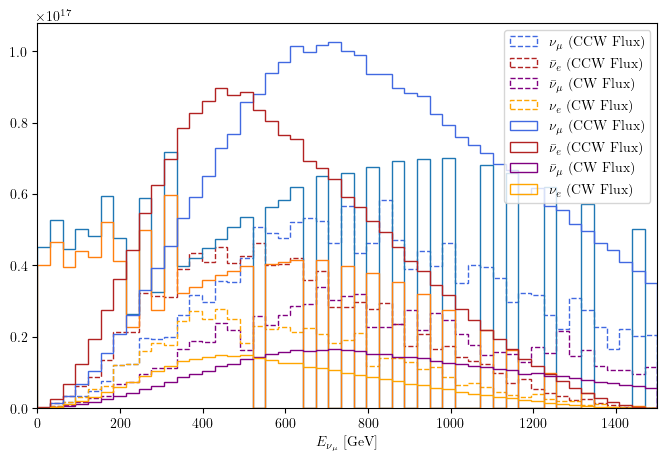

In [8]:
enu_bins = np.linspace(0.0, 1500, 50)

numu_color = 'royalblue'
nuebar_color = 'firebrick'
numubar_color = 'purple'
nue_color = 'orange'

fig, ax = plt.subplots(figsize=(8,5))

plt.hist(1e-3*np.array(flux.flux_energies[in_det_mask_y]), weights=flux.flux_weights_numu[in_det_mask_y],
         bins=enu_bins, histtype='step', label=r"$\nu_\mu$ (CCW Flux)", color=numu_color, ls='dashed')
plt.hist(1e-3*np.array(flux.flux_energies[in_det_mask_y]), weights=flux.flux_weights_nue[in_det_mask_y],
         bins=enu_bins, histtype='step', label=r"$\bar{\nu}_e$ (CCW Flux)", color=nuebar_color, ls='dashed')
plt.hist(1e-3*np.array(flux.flux_energies[in_det_mask_conj_y]), weights=flux.flux_weights_numu[in_det_mask_conj_y],
         bins=enu_bins, histtype='step', label=r"$\bar{\nu}_\mu$ (CW Flux)", color=numubar_color, ls='dashed')
plt.hist(1e-3*np.array(flux.flux_energies[in_det_mask_conj_y]), weights=flux.flux_weights_nue[in_det_mask_conj_y],
         bins=enu_bins, histtype='step', label=r"$\nu_e$ (CW Flux)", color=nue_color, ls='dashed')

# compare to approximate fluxes
plt.hist(1e-3*numu_flux_3TeV[:,0], weights=numu_flux_3TeV[:,2]/10, bins=enu_bins, histtype='step')
plt.hist(1e-3*nue_flux_3TeV[:,0], weights=nue_flux_3TeV[:,2]/10, bins=enu_bins, histtype='step')

# Acceptances
numu_acceptance = 0.02711648456524958
nuebar_acceptance = 0.02688586814831306
numubar_acceptance = 0.0043797003767853376
nue_acceptance = 0.00449802417965592


plt.hist(1e-3*np.array(flux.flux_energies), weights=flux.flux_weights_numu*numu_acceptance,
         bins=enu_bins, histtype='step', label=r"$\nu_\mu$ (CCW Flux)", color=numu_color)
plt.hist(1e-3*np.array(flux.flux_energies), weights=flux.flux_weights_nue*nuebar_acceptance,
         bins=enu_bins, histtype='step', label=r"$\bar{\nu}_e$ (CCW Flux)", color=nuebar_color)
plt.hist(1e-3*np.array(flux.flux_energies), weights=flux.flux_weights_numu*numubar_acceptance,
         bins=enu_bins, histtype='step', label=r"$\bar{\nu}_\mu$ (CW Flux)", color=numubar_color)
plt.hist(1e-3*np.array(flux.flux_energies), weights=flux.flux_weights_nue*nue_acceptance,
         bins=enu_bins, histtype='step', label=r"$\nu_e$ (CW Flux)", color=nue_color)

plt.xlim((enu_bins[0], enu_bins[-1]))
plt.legend()
plt.xlabel(r"$E_{\nu_\mu}$ [GeV]")
plt.show()

## Dump Fluxes

#### $\sqrt{s} = 3$ TeV

Getting rates for 
Nu mu count post accept after 10 years = 2.710773485996688e+19
Nu ebar count post accept after 10 years = 1.713264338312656e+19


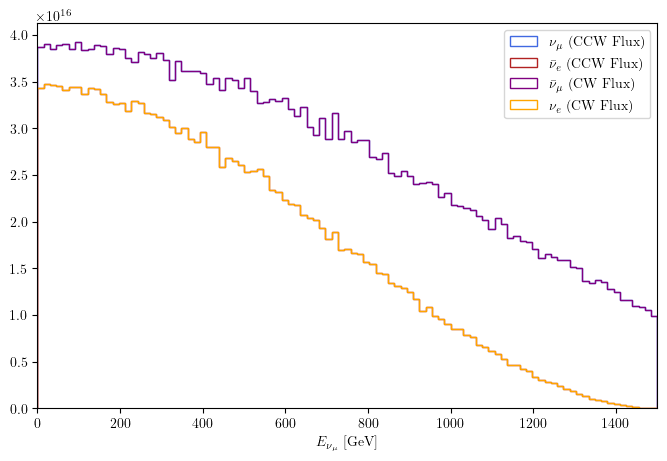

In [2]:
flux = NeutrinoFluxMuonRing(Emu=1.5e6, ring_radius=0.716, det_dist=200.0, n_samples=10000000)
flux.simulate_fluxes_mc()

enu_bins = np.linspace(0.0, 1500, 100)

numu_color = 'royalblue'
nuebar_color = 'firebrick'
numubar_color = 'purple'
nue_color = 'orange'

fig, ax = plt.subplots(figsize=(8,5))

# Acceptances
nu_acceptance = np.arctan(flux.det_width / flux.det_dist) / np.pi


# Create histograms and get rates

h_numu, _ = np.histogram(flux.flux_energies, weights=flux.flux_weights_numu*nu_acceptance, bins=1e3*enu_bins)
h_nue, _ = np.histogram(flux.flux_energies, weights=flux.flux_weights_nue*nu_acceptance, bins=1e3*enu_bins)

print("Getting rates for ")
print("Nu mu count post accept after 10 years = {}".format(10*np.sum(h_numu)))
print("Nu ebar count post accept after 10 years = {}".format(10*np.sum(h_nue)))

plt.hist(1e-3*np.array(flux.flux_energies), weights=flux.flux_weights_numu*nu_acceptance,
         bins=enu_bins, histtype='step', label=r"$\nu_\mu$ (CCW Flux)", color=numu_color)
plt.hist(1e-3*np.array(flux.flux_energies), weights=flux.flux_weights_nue*nu_acceptance,
         bins=enu_bins, histtype='step', label=r"$\bar{\nu}_e$ (CCW Flux)", color=nuebar_color)
plt.hist(1e-3*np.array(flux.flux_energies), weights=flux.flux_weights_numu*nu_acceptance,
         bins=enu_bins, histtype='step', label=r"$\bar{\nu}_\mu$ (CW Flux)", color=numubar_color)
plt.hist(1e-3*np.array(flux.flux_energies), weights=flux.flux_weights_nue*nu_acceptance,
         bins=enu_bins, histtype='step', label=r"$\nu_e$ (CW Flux)", color=nue_color)

plt.xlim((enu_bins[0], enu_bins[-1]))
plt.legend()
plt.xlabel(r"$E_{\nu_\mu}$ [GeV]")
plt.show()

#### Fix norms to 1e19 and output

In [3]:
enu_centers_MeV = 1e3*(enu_bins[1:] + enu_bins[:-1])/2
flux_array_numu = np.array([enu_centers_MeV, h_numu*(1e19/np.sum(h_numu))]).transpose()  # 10 years
np.savetxt("data/numu_energy_flux_MeV_SqrtS-3TeV_1e19nu.txt", flux_array_numu)

flux_array_nue = np.array([enu_centers_MeV, h_nue*(1e19/np.sum(h_nue))]).transpose()  # 10 years
np.savetxt("data/nuebar_energy_flux_MeV_SqrtS-3TeV_1e19nu.txt", flux_array_nue)

#### $\sqrt{s} = 10$ TeV

Getting rates for 
Nu mu count post accept after 10 years = 2.7228573048664007e+19
Nu ebar count post accept after 10 years = 1.7136432825885262e+19


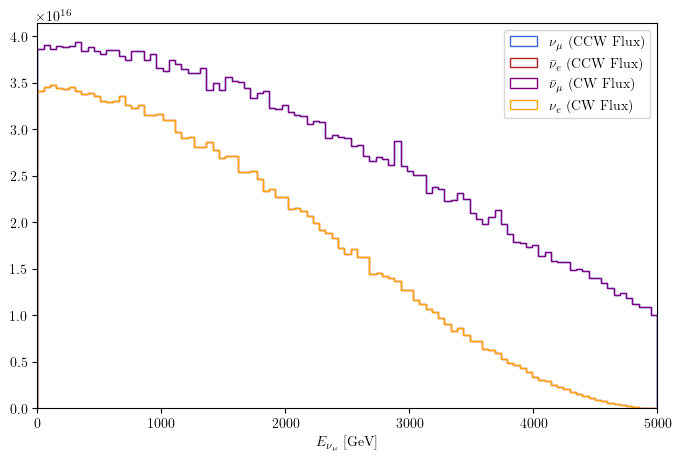

In [4]:
flux = NeutrinoFluxMuonRing(Emu=5e6, ring_radius=0.716, det_dist=200.0, n_samples=10000000)
flux.simulate_fluxes_mc()

enu_bins = np.linspace(0.0, 5000, 100)

numu_color = 'royalblue'
nuebar_color = 'firebrick'
numubar_color = 'purple'
nue_color = 'orange'

fig, ax = plt.subplots(figsize=(8,5))

# Acceptances
nu_acceptance = np.arctan(flux.det_width / flux.det_dist) / np.pi


# Create histograms and get rates
h_numu, _ = np.histogram(flux.flux_energies, weights=flux.flux_weights_numu*nu_acceptance, bins=1e3*enu_bins)
h_nue, _ = np.histogram(flux.flux_energies, weights=flux.flux_weights_nue*nu_acceptance, bins=1e3*enu_bins)

print("Getting rates for ")
print("Nu mu count post accept after 10 years = {}".format(10*np.sum(h_numu)))
print("Nu ebar count post accept after 10 years = {}".format(10*np.sum(h_nue)))


plt.hist(1e-3*np.array(flux.flux_energies), weights=flux.flux_weights_numu*nu_acceptance,
         bins=enu_bins, histtype='step', label=r"$\nu_\mu$ (CCW Flux)", color=numu_color)
plt.hist(1e-3*np.array(flux.flux_energies), weights=flux.flux_weights_nue*nu_acceptance,
         bins=enu_bins, histtype='step', label=r"$\bar{\nu}_e$ (CCW Flux)", color=nuebar_color)
plt.hist(1e-3*np.array(flux.flux_energies), weights=flux.flux_weights_numu*nu_acceptance,
         bins=enu_bins, histtype='step', label=r"$\bar{\nu}_\mu$ (CW Flux)", color=numubar_color)
plt.hist(1e-3*np.array(flux.flux_energies), weights=flux.flux_weights_nue*nu_acceptance,
         bins=enu_bins, histtype='step', label=r"$\nu_e$ (CW Flux)", color=nue_color)

plt.xlim((enu_bins[0], enu_bins[-1]))
plt.legend()
plt.xlabel(r"$E_{\nu_\mu}$ [GeV]")
plt.show()

In [5]:
enu_centers_MeV = 1e3*(enu_bins[1:] + enu_bins[:-1])/2
flux_array_numu = np.array([enu_centers_MeV, h_numu*(1e19/np.sum(h_numu))]).transpose()  # 10 years
np.savetxt("data/numu_energy_flux_MeV_SqrtS-10TeV_1e19nu.txt", flux_array_numu)

flux_array_nue = np.array([enu_centers_MeV, h_nue*(1e19/np.sum(h_nue))]).transpose()  # 10 years
np.savetxt("data/nuebar_energy_flux_MeV_SqrtS-10TeV_1e19nu.txt", flux_array_nue)

#### $\sqrt{s} = 500$ GeV

Getting rates for 
Nu mu count post accept after 10 years = 2.71285138023945e+19
Nu ebar count post accept after 10 years = 1.7242639340424086e+19


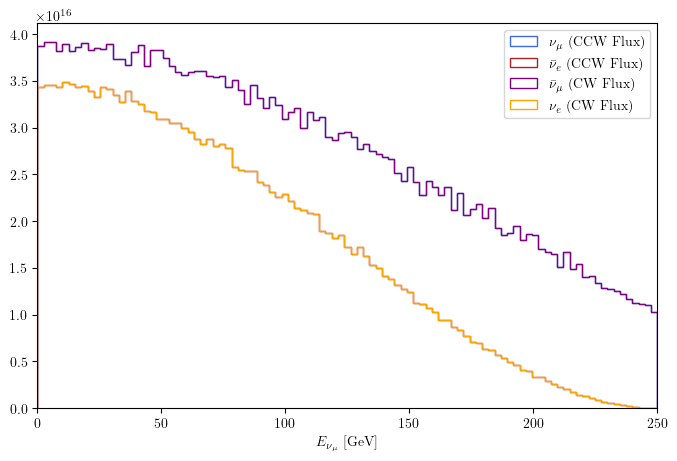

In [12]:
flux = NeutrinoFluxMuonRing(Emu=2.5e5, ring_radius=0.716, det_dist=200.0, n_samples=10000000)
flux.simulate_fluxes_mc()

enu_bins = np.linspace(0.0, 250.0, 100)

numu_color = 'royalblue'
nuebar_color = 'firebrick'
numubar_color = 'purple'
nue_color = 'orange'

fig, ax = plt.subplots(figsize=(8,5))

# Acceptances
nu_acceptance = np.arctan(flux.det_width / flux.det_dist) / np.pi


# Create histograms and get rates
h_numu, _ = np.histogram(flux.flux_energies, weights=flux.flux_weights_numu*nu_acceptance, bins=1e3*enu_bins)
h_nue, _ = np.histogram(flux.flux_energies, weights=flux.flux_weights_nue*nu_acceptance, bins=1e3*enu_bins)

print("Getting rates for ")
print("Nu mu count post accept after 10 years = {}".format(10*np.sum(h_numu)))
print("Nu ebar count post accept after 10 years = {}".format(10*np.sum(h_nue)))


plt.hist(1e-3*np.array(flux.flux_energies), weights=flux.flux_weights_numu*nu_acceptance,
         bins=enu_bins, histtype='step', label=r"$\nu_\mu$ (CCW Flux)", color=numu_color)
plt.hist(1e-3*np.array(flux.flux_energies), weights=flux.flux_weights_nue*nu_acceptance,
         bins=enu_bins, histtype='step', label=r"$\bar{\nu}_e$ (CCW Flux)", color=nuebar_color)
plt.hist(1e-3*np.array(flux.flux_energies), weights=flux.flux_weights_numu*nu_acceptance,
         bins=enu_bins, histtype='step', label=r"$\bar{\nu}_\mu$ (CW Flux)", color=numubar_color)
plt.hist(1e-3*np.array(flux.flux_energies), weights=flux.flux_weights_nue*nu_acceptance,
         bins=enu_bins, histtype='step', label=r"$\nu_e$ (CW Flux)", color=nue_color)

plt.xlim((enu_bins[0], enu_bins[-1]))
plt.legend()
plt.xlabel(r"$E_{\nu_\mu}$ [GeV]")
plt.show()

In [13]:
enu_centers_MeV = 1e3*(enu_bins[1:] + enu_bins[:-1])/2
flux_array_numu = np.array([enu_centers_MeV, h_numu*(1e19/np.sum(h_numu))]).transpose()  # 10 years
np.savetxt("data/numu_energy_flux_MeV_SqrtS-500GeV_1e19nu.txt", flux_array_numu)

flux_array_nue = np.array([enu_centers_MeV, h_nue*(1e19/np.sum(h_nue))]).transpose()  # 10 years
np.savetxt("data/nuebar_energy_flux_MeV_SqrtS-500GeV_1e19nu.txt", flux_array_nue)

1e+19
1e+19
1.0000000000000002e+19
1e+19
1e+19
1.0000000000000002e+19


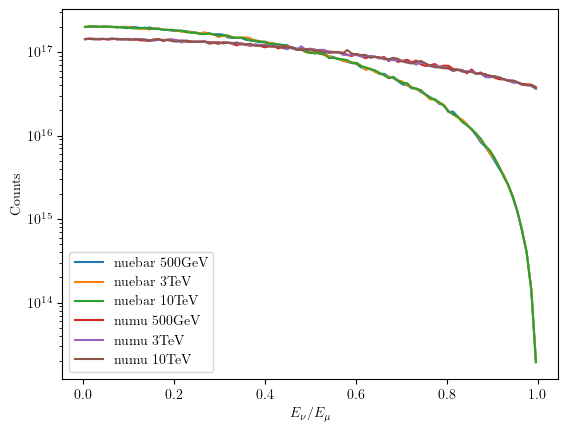

In [14]:
flux_nue_500GeV = np.genfromtxt("data/nuebar_energy_flux_MeV_SqrtS-500GeV_1e19nu.txt")
flux_nue_3TeV = np.genfromtxt("data/nuebar_energy_flux_MeV_SqrtS-3TeV_1e19nu.txt")
flux_nue_10TeV = np.genfromtxt("data/nuebar_energy_flux_MeV_SqrtS-10TeV_1e19nu.txt")

flux_numu_500GeV = np.genfromtxt("data/numu_energy_flux_MeV_SqrtS-500GeV_1e19nu.txt")
flux_numu_3TeV = np.genfromtxt("data/numu_energy_flux_MeV_SqrtS-3TeV_1e19nu.txt")
flux_numu_10TeV = np.genfromtxt("data/numu_energy_flux_MeV_SqrtS-10TeV_1e19nu.txt")

print(np.sum(flux_nue_500GeV[:,1]))
print(np.sum(flux_nue_3TeV[:,1]))
print(np.sum(flux_nue_10TeV[:,1]))
print(np.sum(flux_numu_500GeV[:,1]))
print(np.sum(flux_numu_3TeV[:,1]))
print(np.sum(flux_numu_10TeV[:,1]))

plt.plot(flux_nue_500GeV[:,0]/250e3, flux_nue_500GeV[:,1], label="nuebar 500GeV")
plt.plot(flux_nue_3TeV[:,0]/1500e3, flux_nue_3TeV[:,1], label="nuebar 3TeV")
plt.plot(flux_nue_10TeV[:,0]/5000e3, flux_nue_10TeV[:,1], label="nuebar 10TeV")

plt.plot(flux_numu_500GeV[:,0]/250e3, flux_numu_500GeV[:,1], label="numu 500GeV")
plt.plot(flux_numu_3TeV[:,0]/1500e3, flux_numu_3TeV[:,1], label="numu 3TeV")
plt.plot(flux_numu_10TeV[:,0]/5000e3, flux_numu_10TeV[:,1], label="numu 10TeV")

plt.yscale('log')
plt.ylabel("Counts")
plt.xlabel(r"$E_\nu / E_\mu$")

plt.legend()
plt.show()

# Diagrams

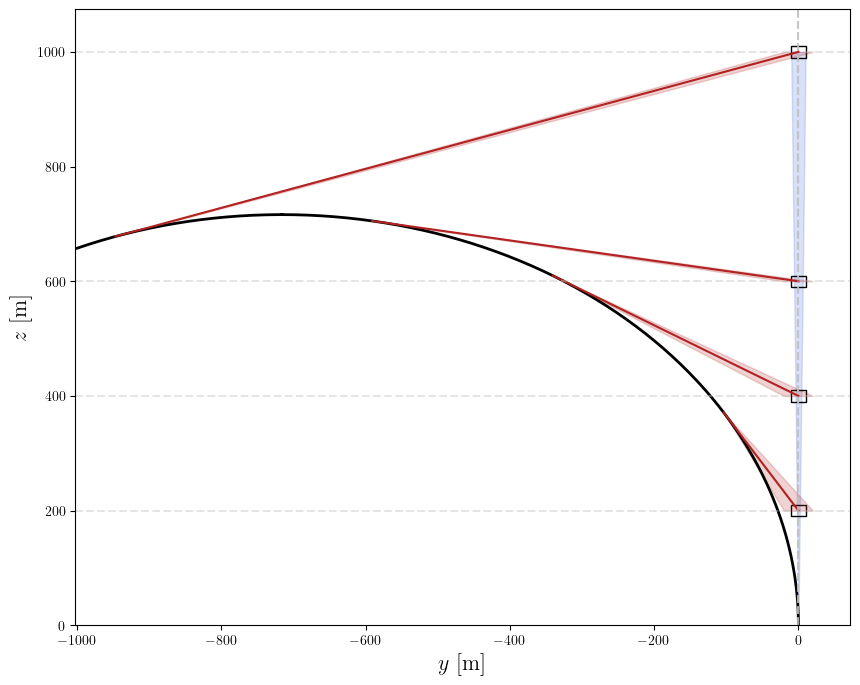

In [64]:
# draw a circle of Radius 4.5 km

circumf = 4500.0
R = circumf/(2*pi)
ring_thetas = np.linspace(0.0, 2*np.pi, 1000)
ring_z = R*np.cos(ring_thetas)
ring_y = R*np.sin(ring_thetas) - R


fig, ax = plt.subplots(figsize=(10,8))

ax.plot(ring_y, ring_z, color='k', linewidth=2.0)


# draw detector positions
# Draw 5x5 boxes at specified positions
box_positions = [(0, 200), (0, 400), (0, 600), (0, 1000)]
box_size = 20

plot_x_range = (-R-0.4*R, 0.1*R)
plot_y_range = (0.0, 1.5*R)

def ring_pos(theta):
    return R*cos(theta) - R, R*sin(theta)

plt.fill_betweenx([0.0, 1000], [0.0, -box_size/2], [0.0, box_size/2], color="royalblue", alpha=0.2)

for y, z in box_positions:
    rect = plt.Rectangle((y - box_size / 2, z - box_size / 2), box_size, box_size,
                         linewidth=1.0, edgecolor='k', facecolor='none')
    ax.add_patch(rect)

    ax.hlines(z, xmin=plot_x_range[0], xmax=plot_x_range[1], color='silver', alpha=0.4, ls='dashed')
    ax.vlines(y, ymin=plot_y_range[0], ymax=plot_y_range[1], color='silver', alpha=0.4, ls='dashed')

    # Find tangent points: two solutions
    L_over_R = z/R
    theta_tangent = np.arctan2(2*L_over_R/(1+L_over_R**2),(1-L_over_R**2)/(1+L_over_R**2))
    theta_tangent_2 = np.arctan2(2*L_over_R/(1+L_over_R**2),(1-L_over_R**2)/(1+L_over_R**2))
    y_T1, z_T1 = ring_pos(theta_tangent)
    #y_T2, z_T2 = ring_pos(theta_tangent_2)

    plt.plot([y_T1, 0], [z_T1, z], color="firebrick")
    plt.fill_betweenx([z_T1, z], [y_T1, -box_size], [y_T1, box_size], color="firebrick", alpha=0.2)


ax.set_xlim(plot_x_range)
ax.set_ylim(plot_y_range)

ax.set_xlabel(r"$y$ [m]",fontsize=16)
ax.set_ylabel(r"$z$ [m]",fontsize=16)

plt.show()

# $\theta_\nu$ vs $\theta_\perp$ plot

In [2]:
circumf = 4500.0
R = circumf/(2*pi)
det_pos = np.array([R+50, R+170, R+300])
det_dists = sqrt(det_pos**2 - R**2)


flux_1 = NeutrinoFluxMuonRing(Emu=1.5e6, ring_radius=0.716, n_samples=10000000,
                            det_dist=det_dists[0], det_area=100.0, det_length=10.0)
flux_1.simulate_fluxes_mc()

flux_2 = NeutrinoFluxMuonRing(Emu=1.5e6, ring_radius=0.716, n_samples=10000000,
                            det_dist=det_dists[1], det_area=100.0, det_length=10.0)
flux_2.simulate_fluxes_mc()

flux_3 = NeutrinoFluxMuonRing(Emu=1.5e6, ring_radius=0.716, n_samples=10000000,
                            det_dist=det_dists[2], det_area=100.0, det_length=10.0)
flux_3.simulate_fluxes_mc()

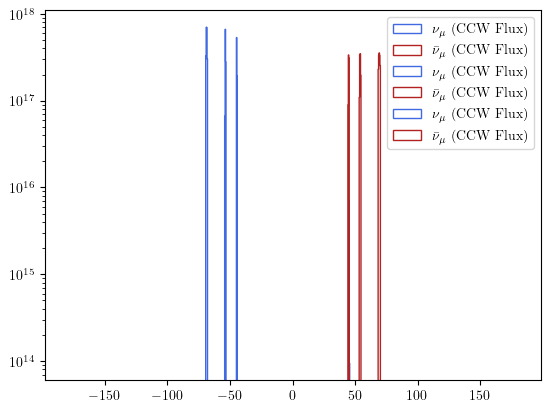

In [3]:
# extract the angles of the neutrinos in the detector frame
# Theta_numu should be in the z-y plane (no x)
weights_numu_1 = flux_1.accept_wgt_numu
theta_numu_1 = np.array([arccos(p[2]/sqrt(p[1]**2 + p[2]**2)) for p in flux_1.pnumu_3vec_lab])
theta_numu_1 = 180.0*(theta_numu_1 - arccos(flux_1.det_dist / sqrt(flux_1.det_dist**2 + flux_1.R**2)))/pi
x_numu_1 = flux_1.x_numu_at_L

weights_numubar_1 = flux_1.accept_wgt_numubar
theta_numubar_1 = np.array([arccos(p[2]/sqrt(p[1]**2 + p[2]**2)) for p in flux_1.pnumubar_3vec_lab])
theta_numubar_1 = 180.0*(theta_numubar_1 - arccos(flux_1.det_dist / sqrt(flux_1.det_dist**2 + flux_1.R**2)))/pi
x_numubar_1 = flux_1.x_numubar_at_L

weights_numu_2 = flux_2.accept_wgt_numu
theta_numu_2 = np.array([arccos(p[2]/sqrt(p[1]**2 + p[2]**2)) for p in flux_2.pnumu_3vec_lab])
theta_numu_2 = 180.0*(theta_numu_2 - arccos(flux_2.det_dist / sqrt(flux_2.det_dist**2 + flux_2.R**2)))/pi
x_numu_2 = flux_2.x_numu_at_L

weights_numubar_2 = flux_2.accept_wgt_numubar
theta_numubar_2 = np.array([arccos(p[2]/sqrt(p[1]**2 + p[2]**2)) for p in flux_2.pnumubar_3vec_lab])
theta_numubar_2 = 180.0*(theta_numubar_2 - arccos(flux_2.det_dist / sqrt(flux_2.det_dist**2 + flux_2.R**2)))/pi
x_numubar_2 = flux_2.x_numubar_at_L

weights_numu_3 = flux_3.accept_wgt_numu
theta_numu_3 = np.array([arccos(p[2]/sqrt(p[1]**2 + p[2]**2)) for p in flux_3.pnumu_3vec_lab])
theta_numu_3 = 180.0*(theta_numu_3 - arccos(flux_3.det_dist / sqrt(flux_3.det_dist**2 + flux_3.R**2)))/pi
x_numu_3 = flux_3.x_numu_at_L

weights_numubar_3 = flux_3.accept_wgt_numubar
theta_numubar_3 = np.array([arccos(p[2]/sqrt(p[1]**2 + p[2]**2)) for p in flux_3.pnumubar_3vec_lab])
theta_numubar_3 = 180.0*(theta_numubar_3 - arccos(flux_3.det_dist / sqrt(flux_3.det_dist**2 + flux_3.R**2)))/pi
x_numubar_3 = flux_3.x_numubar_at_L

theta_bins = np.linspace(-180.0, 180.0, 1000)

plt.hist(theta_numu_1, weights=weights_numu_1, bins=theta_bins, histtype='step', label=r"$\nu_\mu$ (CCW Flux)", color='royalblue')
plt.hist(theta_numubar_1, weights=weights_numubar_1, bins=theta_bins, histtype='step', label=r"$\bar{\nu}_\mu$ (CCW Flux)", color='firebrick')
plt.hist(theta_numu_2, weights=weights_numu_2, bins=theta_bins, histtype='step', label=r"$\nu_\mu$ (CCW Flux)", color='royalblue', ls='dashed')
plt.hist(theta_numubar_2, weights=weights_numubar_2, bins=theta_bins, histtype='step', label=r"$\bar{\nu}_\mu$ (CCW Flux)", color='firebrick', ls='dashed')
plt.hist(theta_numu_3, weights=weights_numu_3, bins=theta_bins, histtype='step', label=r"$\nu_\mu$ (CCW Flux)", color='royalblue', ls='dotted')
plt.hist(theta_numubar_3, weights=weights_numubar_3, bins=theta_bins, histtype='step', label=r"$\bar{\nu}_\mu$ (CCW Flux)", color='firebrick', ls='dotted')
plt.legend()
plt.yscale('log')
#plt.xscale('log')
plt.show()


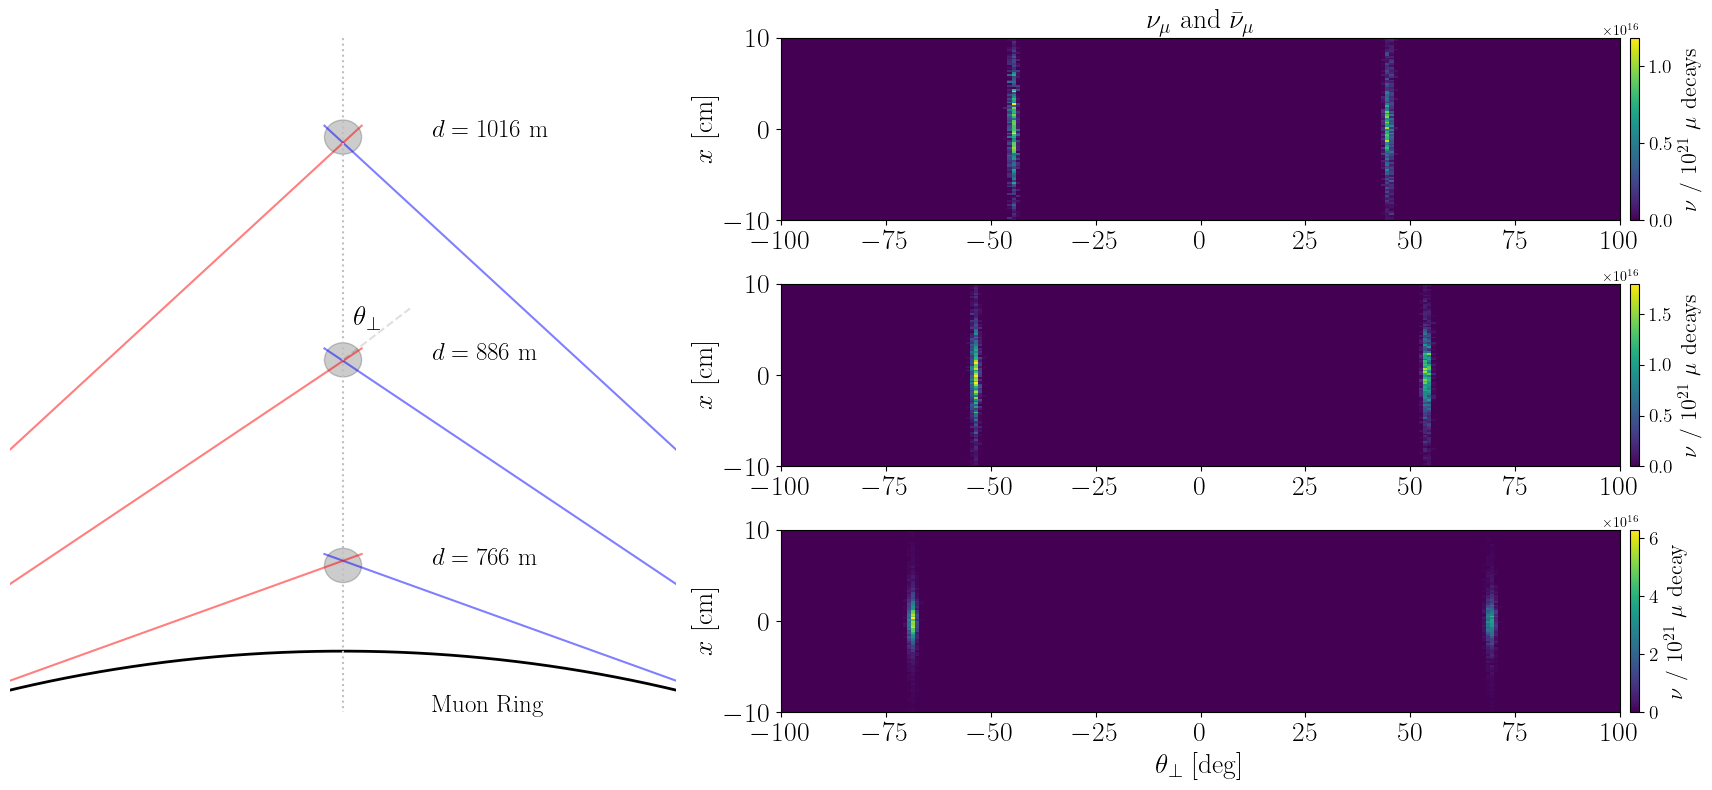

In [29]:
import matplotlib.gridspec as gridspec
from matplotlib.patches import Circle
from matplotlib.ticker import FuncFormatter
from scipy.stats import norm

# Ring params
circumf = 4500.0
R = circumf/(2*pi)
ring_thetas = np.linspace(0.0, np.pi, 1000)
ring_z = R*np.sin(ring_thetas)
ring_y = R*np.cos(ring_thetas)

# Detector positions
det_pos = [(0, R+50), (0, R+170), (0, R+300)]
det_size = 20


fig = plt.figure(figsize=(18,8))
gs = gridspec.GridSpec(3, 2, width_ratios=[1, 1.5], height_ratios=[1, 1, 1])
# Left plot (spanning all rows)
ax_left = plt.subplot(gs[:, 0])  # Span all rows

ax_left.set_xlim((-R/4, R/4))
ax_left.set_ylim((0.95*R, 1.5*R))

# Right plots (stacked)
ax_right_top = plt.subplot(gs[0, 1])
ax_right_middle = plt.subplot(gs[1, 1])
ax_right_bottom = plt.subplot(gs[2, 1])

for p in det_pos:
    circ = Circle((p[0], p[1]), radius=det_size/2, color='k', alpha=0.2)
    ax_left.add_patch(circ)

    # tangent points
    xTplus = R * sqrt(p[1]**2 - R**2) / p[1]
    xTminus = -R * sqrt(p[1]**2 - R**2) / p[1]
    yT = R**2 / p[1]

    ax_left.plot([xTplus, p[0]-det_size/2], [yT, p[1]+det_size/3], color='b', alpha=0.5)
    ax_left.plot([xTminus, p[0]+det_size/2], [yT, p[1]+det_size/3], color='r', alpha=0.5)


ax_left.plot([det_pos[1][0], det_pos[1][0]+1.8*det_size], [det_pos[1][1], det_pos[1][1]+1.5*det_size],
             color='silver', ls='dashed', alpha=0.5, zorder=0)
ax_left.text(det_pos[1][0]+0.3*det_size, det_pos[1][1]+1.0*det_size, r"$\theta_\perp$", fontsize=20, color='k')

ax_left.text(R/15, det_pos[0][1], r"$d=766$ m", fontsize=18, color='k')
ax_left.text(R/15, det_pos[1][1], r"$d=886$ m", fontsize=18, color='k')
ax_left.text(R/15, det_pos[2][1], r"$d=1016$ m", fontsize=18, color='k')
ax_left.text(R/15, R*0.95, r"Muon Ring", fontsize=18, color='k')

ax_left.plot(ring_y, ring_z, color='k', linewidth=2.0)
ax_left.vlines(0.0, ymin=0.0, ymax=1.2*det_pos[2][1], color='silver', ls='dotted')

# Hide the left axis
ax_left.axis("off")

# Function for transforming the y-axis values
def transform_y_to_Ly_1(y, _):
    return f"{1000*arctan(0.01*y/flux_1.det_dist):.3f}"  # Format as integer

def transform_y_to_Ly_2(y, _):
    return f"{1000*arctan(0.01*y/flux_2.det_dist):.3f}"  # Format as integer

def transform_y_to_Ly_3(y, _):
    return f"{1000*arctan(0.01*y/flux_3.det_dist):.3f}"  # Format as integer


"""
    # Add secondary y-axis to the right of the middle subplot
    ax_right_middle2 = ax_right_middle.twinx()
    ax_right_middle2.set_ylabel(r"$\theta_\nu$ [mrad]", fontsize=20, rotation=270, labelpad=15)
    ax_right_middle2.tick_params(right=True, labelright=True, labelsize=18)

    ax_right_bottom2 = ax_right_bottom.twinx()
    ax_right_bottom2.set_ylabel(r"$\theta_\nu$ [mrad]", fontsize=20, rotation=270, labelpad=15)
    ax_right_bottom2.tick_params(right=True, labelright=True, labelsize=18)

    ax_right_top2 = ax_right_top.twinx()
    ax_right_top2.set_ylabel(r"$\theta_\nu$ [mrad]", fontsize=20, rotation=270, labelpad=15)
    ax_right_top2.tick_params(right=True, labelright=True, labelsize=18)

    # Apply transformation
    ax_right_top2.yaxis.set_major_formatter(FuncFormatter(transform_y_to_Ly_3))
    ax_right_middle2.yaxis.set_major_formatter(FuncFormatter(transform_y_to_Ly_2))
    ax_right_bottom2.yaxis.set_major_formatter(FuncFormatter(transform_y_to_Ly_1))

    # manually set ranges for right y-axis
    ax_right_bottom2.set_ylim(1000*arctan(-0.01*10/flux_1.det_dist), 1000*arctan(0.01*10/flux_1.det_dist))
    ax_right_middle2.set_ylim(1000*arctan(-0.01*10/flux_2.det_dist), 1000*arctan(0.01*10/flux_2.det_dist))
    ax_right_top2.set_ylim(1000*arctan(-0.01*10/flux_3.det_dist), 1000*arctan(0.01*10/flux_3.det_dist))
"""


# Plot dists
x_bins = np.linspace(-10, 10, 101)
theta_bins = np.linspace(-100.0, 100.0, 201)
noise = norm.rvs(loc=0, scale=0.5, size=20000000)
htop = ax_right_top.hist2d(noise+np.append(theta_numu_3, theta_numubar_3),
                     100*np.append(x_numu_3, x_numubar_3),
                     weights=np.append(weights_numu_3, weights_numubar_3),
                     bins=[theta_bins, x_bins])

hmid = ax_right_middle.hist2d(noise+np.append(theta_numu_2, theta_numubar_2),
                     100*np.append(x_numu_2, x_numubar_2),
                     weights=np.append(weights_numu_2, weights_numubar_2),
                     bins=[theta_bins, x_bins])

hbot = ax_right_bottom.hist2d(noise+np.append(theta_numu_1, theta_numubar_1),
                     100*np.append(x_numu_1, x_numubar_1),
                     weights=np.append(weights_numu_1, weights_numubar_1),
                     bins=[theta_bins, x_bins])

ax_right_bottom.set_xlabel(r"$\theta_\perp$ [deg]", fontsize=20)
ax_right_middle.set_ylabel(r"$x$ [cm]", fontsize=20)
ax_right_top.set_ylabel(r"$x$ [cm]", fontsize=20)
ax_right_bottom.set_ylabel(r"$x$ [cm]", fontsize=20)
ax_right_top.set_title(r"$\nu_\mu$ and $\bar{\nu}_\mu$", fontsize=20)
ax_right_top.tick_params(labelsize=20)
ax_right_middle.tick_params(labelsize=20)
ax_right_bottom.tick_params(labelsize=20)

# Add colorbars
cbar_top = fig.colorbar(htop[3], ax=ax_right_top, orientation="vertical", pad=0.01)
cbar_middle = fig.colorbar(hmid[3], ax=ax_right_middle, orientation="vertical", pad=0.01)
cbar_bottom = fig.colorbar(hbot[3], ax=ax_right_bottom, orientation="vertical", pad=0.01)

# Set colorbar labels
cbar_top.set_label(r"$\nu$ / $10^{21}$ $\mu$ decays", fontsize=16)
cbar_middle.set_label(r"$\nu$ / $10^{21}$ $\mu$ decays", fontsize=16)
cbar_bottom.set_label(r"$\nu$ / $10^{21}$ $\mu$ decay", fontsize=16)

# Adjust label font size
cbar_top.ax.tick_params(labelsize=14)
cbar_middle.ax.tick_params(labelsize=14)
cbar_bottom.ax.tick_params(labelsize=14)


plt.tight_layout()
plt.savefig("plots/fluxes/flux_slices_by_distance.png", dpi=300)
plt.show()
